### Session 2: Training a network w/ Tensorflow

lecture: https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb

In [51]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Creating a Neural Network - basic regression problem 

##### create some dummy data 

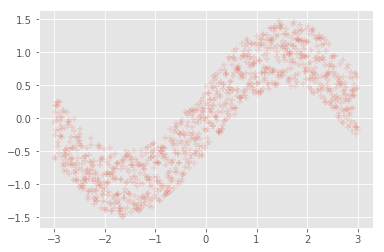

In [52]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
## create a sign wave with some random noise
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

##### Define Cost

In [53]:
# start an interactive session
sess = tf.InteractiveSession()
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')
# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

In [54]:
# initiate weight with a random small number 
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')
# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)
cost = tf.reduce_mean(distance(Y_pred, Y))    # get the mean of all error terms 

##### Define optimizer and run model

/Users/huang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.72256
0.567206
0.481367
0.44282
0.42477
0.417053
0.412864
0.410581
0.409741
0.409497
0.409387
0.409347
0.409319


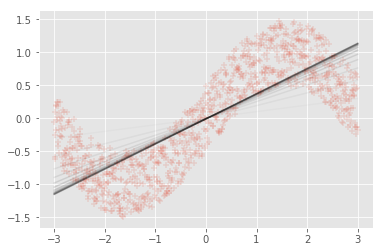

In [55]:
## choose an optimizer -- we can use gradientdescent here
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')

## start the session and run the model 
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all,initiate W and B
    sess.run(tf.global_variables_initializer())
    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        # every 10 iterations
        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()
            print(training_cost)
        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        # Keep track of the training cost
        prev_training_cost = training_cost


#### Stochastic and Mini Batch Gradient Descent

##### run random mini batches to get better global minium

In [56]:
## batch size should not be too big 
def train(X, Y, Y_pred, n_iterations=100, batch_size=100, learning_rate=0.01):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # initiate all random variables 
        sess.run(tf.global_variables_initializer())
        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))    ## randomize batches 
            n_batches = len(idxs) // batch_size             ## return integer
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
                
            # Allow the training to quit if we've reached a minimum
            #if np.abs(prev_training_cost - training_cost) < 0.000001:
            #    break
            # Keep track of the training cost
            prev_training_cost = training_cost
        
    fig.show()
    plt.draw()

0.565695
0.409336
0.409317
0.40935
0.409333
0.409307
0.409306
0.409307
0.409306
0.409306


/Users/huang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


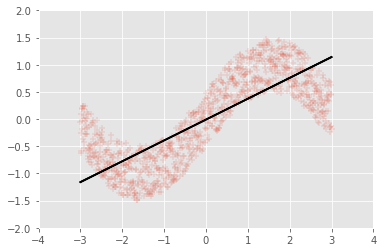

In [57]:
train(X,Y,Y_pred)

### Run multinominal regression 

0.617426
0.335597
0.363877
0.300821
0.301019
0.268174
0.372305
0.270883
0.279028
0.255347


/Users/huang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


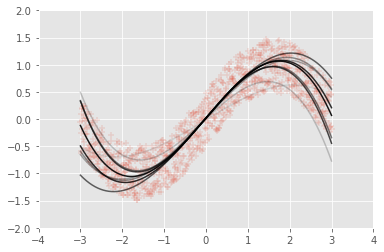

In [58]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)
    ## this is basically making Y_pred = X*W+B : X = [x,x**2 etc]
    
# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

multinominal regression is not very useful because you need an assumption of the underlining model to make it reasonable

### Non-linear activation function 

- So instead a linear function, we can also use other non-linear functions like logistic regression
- Y_pred = sigmoid(X*W + B)
- we will take a look at 3 activation function

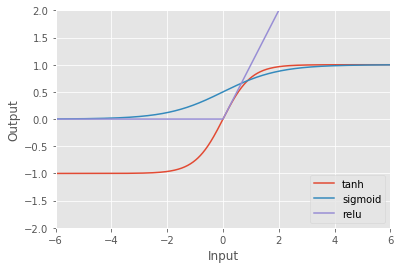

In [59]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.571538
0.375997
0.307148
0.285819
0.27857
0.276283
0.275426
0.274868
0.274478
0.27418


/Users/huang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


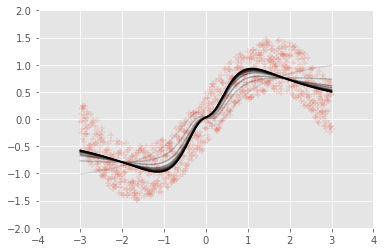

In [60]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')     # W is a 1 X 10 row vector
# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b') 
# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h') # tf.expand_dims(X,1) turns X into n X 1 vector
# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)    ## aggregate all
# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

### Use scope to contain operations to different layers 

- first clear default graph

In [144]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
g=tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [145]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h
    
## batch size should not be too big 
def train_multi(X, Y, Y_pred, n_iterations=500, batch_size=100, learning_rate=0.01):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # initiate all random variables 
        sess.run(tf.global_variables_initializer())
        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))    ## randomize batches 
            n_batches = len(idxs) // batch_size             ## return integer
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
                
            # Allow the training to quit if we've reached a minimum
            #if np.abs(prev_training_cost - training_cost) < 0.000001:
            #    break
            # Keep track of the training cost
            prev_training_cost = training_cost
        
    fig.show()
    plt.draw()

#### initiate X and Y

In [146]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
activation = tf.nn.tanh


#### construct network

In [142]:
# h1 = linear(X, 1, 10, activation,scope='layer1')
# h2 = linear(h1, 10, 10, activation,scope='layer2')
# h3 = linear(h2, 10, 3, activation,scope='layer3')
# h4 = linear(h3, 3, 1, activation,scope='layer4')
# Y_pred = h4

##### Even more concised way of building the network 

In [147]:
n_neurons = [1, 10, 10, 3, 1]   ## first and last layer should match your input and output
## add each layer using a loop 
current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=activation,
        scope='layer_' + str(layer_i))
Y_pred = current_input

#### Set up input and train the model 

In [148]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
xs = xs.reshape([len(xs),1])         # make input x as column vector 
ys = ys.reshape([len(ys),1])         # make y as column vector

0.551673
0.333455
0.325454
0.324818
0.324531
0.324308
0.324077
0.323821
0.323542
0.323235
0.322905
0.322547
0.322143
0.321707
0.321216
0.320648
0.32003
0.319357
0.318652
0.317879


/Users/huang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


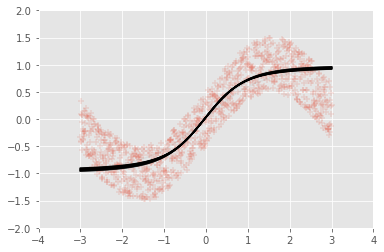

In [149]:
## train the model 
train_multi(X,Y,Y_pred,200,100,0.01)